<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-5/blob/main/Entrega2_Reto_Equipo5_tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: TC4029.10 Ciencia y analitica de datos**
###Tecnológico de Monterrey

**Profr. Dra. María de la Paz Rico Fernández**

###**Entrega 2 (18/11) -> Clasificación-ensambles**

**EQUIPO 5:**

* **Laura Irán González Ojeda**
 *	Matrícula: A01794099

* **Marcela Alejandra Rosales Jiménez**
 *	 Matrícula: A01032022

Fecha de entrega: 18 de Noviembre de 2022

# Reto Entrega 2
# Aguas subterráneas

## Instrucciones

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
- Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
 - Decision trees
 - Random Forest.
- Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
- Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

## Importar librerias y dataset

In [1]:
#Importación de Librerías
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, validation_curve, learning_curve, GridSearchCV


from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer


In [2]:
#Descarga de la Base de datos de calidad de agua
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))
#Extracción del conjunto de datos
zipfile.extractall('/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo')
df_subterraneas = pd.read_csv("/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding="cp1252")
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


## Limpieza de datos

Se realiza la limpieza del dataset como se documenta en la [entrega 1](Entrega1_Reto_Equipo5.ipynb) del Reto.


In [3]:
# Funcion para rellenar valores NaN con numeros aleatorios
def fill_random(column_val):
    if np.isnan(column_val) == True: 
        column_val = random.uniform(start, stop)
    else:
         column_val = column_val
    return column_val

In [4]:
# Eliminamos la columna SDT_mg/L ya que todos sus valores con NaN.
df_subterraneas.drop(columns=["SDT_mg/L"], inplace=True)

# Eliminamos la columna CLAVE ya que puede interferir en el análisis y tiene un valor distinto para cada renglón.
df_subterraneas.drop(columns=["CLAVE"], inplace=True)

promedio_alc_mgl = df_subterraneas["ALC_mg/L"].mean()
df_subterraneas['ALC_mg/L'] = df_subterraneas['ALC_mg/L'].fillna(promedio_alc_mgl)

mode_calidad_alc = df_subterraneas["CALIDAD_ALC"].mode()[0]
df_subterraneas['CALIDAD_ALC'] = df_subterraneas['CALIDAD_ALC'].replace(np.nan, mode_calidad_alc)

fill_var = df_subterraneas["CONDUCT_mS/cm"].mean()
df_subterraneas['CONDUCT_mS/cm'] = df_subterraneas['CONDUCT_mS/cm'].fillna(fill_var)

fill_var = df_subterraneas["CALIDAD_CONDUC"].mode()[0]
df_subterraneas['CALIDAD_CONDUC'] = df_subterraneas['CALIDAD_CONDUC'].replace(np.nan, fill_var)

df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].replace("<25", np.nan)
df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].astype(float)
fill_var = df_subterraneas["SDT_M_mg/L"].mean()
df_subterraneas['SDT_M_mg/L'] = df_subterraneas['SDT_M_mg/L'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_SDT_ra"].mode()[0]
df_subterraneas['CALIDAD_SDT_ra'] = df_subterraneas['CALIDAD_SDT_ra'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_SDT_salin"].mode()[0]
df_subterraneas['CALIDAD_SDT_salin'] = df_subterraneas['CALIDAD_SDT_salin'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_DUR"].mode()[0]
df_subterraneas['CALIDAD_DUR'] = df_subterraneas['CALIDAD_DUR'].replace(np.nan, fill_var)

fill_var = df_subterraneas["CALIDAD_N_NO3"].mode()[0]
df_subterraneas['CALIDAD_N_NO3'] = df_subterraneas['CALIDAD_N_NO3'].replace(np.nan, fill_var)

df_subterraneas['CONTAMINANTES'] = df_subterraneas['CONTAMINANTES'].replace(np.nan, "Desconocido")

# DUR_mg/L contiene un renglón con valor NaN y 26 valores string.
# Vamos a ponerle a esos 27 valores el promedio de esa columna de los valores <20.
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].replace("<20", np.nan)
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].astype(float)
start = 0
stop = 19
df_subterraneas['DUR_mg/L'] = df_subterraneas['DUR_mg/L'].apply(fill_random)

# Se procederá a relizar el mismo proceso anterior para normalizar los datos con <0.20
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].replace("<0.02", np.nan)
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].astype(float)
start = 0.0
stop = 0.019
df_subterraneas['N_NO3_mg/L'] = df_subterraneas['N_NO3_mg/L'].apply(fill_random)

#Eliminamos los caracteres especiales '<' de las columnas numericas para evitar la pérdida de información
columns = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L',
          'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

df_subterraneas[columns] = df_subterraneas[columns].replace({'<':''}, regex=True)


In [5]:
tmp = df_subterraneas.isna().sum().to_frame()
tmp[tmp[0]>0]

,0


In [6]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   PERIODO               1068 non-null   int64  
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           1068 non-null   object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        1068 non-null   object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_ra        1068 non-null   object 
 15  CALIDAD_SDT_salin    

Identificamos las columnas numéricas, categóricas y strings.

Estas listas no incluyen el target Semáforo.

In [7]:
col_numericas = [
    "LONGITUD",
    "LATITUD",
    "PERIODO",
    "ALC_mg/L",
    "CONDUCT_mS/cm",
    "SDT_M_mg/L",
    "FLUORUROS_mg/L",
    "DUR_mg/L",
    "COLI_FEC_NMP/100_mL",
    "N_NO3_mg/L",
    "AS_TOT_mg/L",
    "CD_TOT_mg/L",
    "CR_TOT_mg/L",
    "HG_TOT_mg/L",
    "PB_TOT_mg/L",
    "MN_TOT_mg/L",
    "FE_TOT_mg/L",
]

col_categoricas = [
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO', 
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE'
]

col_strings = [
  'SITIO',
  'ORGANISMO_DE_CUENCA',
  'ESTADO',
  'MUNICIPIO',
  'ACUIFERO',  
  'CONTAMINANTES',
]

In [8]:
#Cambio del tipo de dato Object a Float en variables definidas como numéricas 
df_subterraneas[col_numericas]= df_subterraneas[col_numericas].astype('float')

#Cambio del tipo de dato Object a Category en variables definidas como categóricas 
df_subterraneas[col_categoricas] = df_subterraneas[col_categoricas].astype('category')

In [9]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SITIO                 1068 non-null   object  
 1   ORGANISMO_DE_CUENCA   1068 non-null   object  
 2   ESTADO                1068 non-null   object  
 3   MUNICIPIO             1068 non-null   object  
 4   ACUIFERO              1068 non-null   object  
 5   SUBTIPO               1068 non-null   category
 6   LONGITUD              1068 non-null   float64 
 7   LATITUD               1068 non-null   float64 
 8   PERIODO               1068 non-null   float64 
 9   ALC_mg/L              1068 non-null   float64 
 10  CALIDAD_ALC           1068 non-null   category
 11  CONDUCT_mS/cm         1068 non-null   float64 
 12  CALIDAD_CONDUC        1068 non-null   category
 13  SDT_M_mg/L            1068 non-null   float64 
 14  CALIDAD_SDT_ra        1068 non-null   category
 15  CALI

## Selecciona tus variables independientes X y dependiente Y (semáforo)


Para las variables independientes X se decidió no utilizar los features `SITIO`, `ORGANISMO_DE_CUENCA`, `ESTADO`, `MUNICIPIO` y `ACUIFERO` ya que dan informacion redundante.

Además, el feature `CONTAMINANTES` tiene demasiados valors nulos y podría sesgar el dataset.

In [10]:
features = [
  #'SITIO',
  #'ORGANISMO_DE_CUENCA',
  #'ESTADO',
  #'MUNICIPIO',
  #'ACUIFERO',
  'SUBTIPO',
  'LONGITUD',
  'LATITUD',
  'PERIODO',
  'ALC_mg/L',
  'CALIDAD_ALC',
  'CONDUCT_mS/cm',
  'CALIDAD_CONDUC',
  'SDT_M_mg/L',
  'CALIDAD_SDT_ra',
  'CALIDAD_SDT_salin',
  'FLUORUROS_mg/L',
  'CALIDAD_FLUO',
  'DUR_mg/L',
  'CALIDAD_DUR',
  'COLI_FEC_NMP/100_mL',
  'CALIDAD_COLI_FEC',
  'N_NO3_mg/L',
  'CALIDAD_N_NO3',
  'AS_TOT_mg/L',
  'CALIDAD_AS',
  'CD_TOT_mg/L',
  'CALIDAD_CD',
  'CR_TOT_mg/L',
  'CALIDAD_CR',
  'HG_TOT_mg/L',
  'CALIDAD_HG',
  'PB_TOT_mg/L',
  'CALIDAD_PB',
  'MN_TOT_mg/L',
  'CALIDAD_MN',
  'FE_TOT_mg/L',
  'CALIDAD_FE',
  #'CONTAMINANTES',
  'CUMPLE_CON_ALC',
  'CUMPLE_CON_COND',
  'CUMPLE_CON_SDT_ra',
  'CUMPLE_CON_SDT_salin',
  'CUMPLE_CON_FLUO',
  'CUMPLE_CON_DUR',
  'CUMPLE_CON_CF',
  'CUMPLE_CON_NO3',
  'CUMPLE_CON_AS',
  'CUMPLE_CON_CD',
  'CUMPLE_CON_CR',
  'CUMPLE_CON_HG',
  'CUMPLE_CON_PB',
  'CUMPLE_CON_MN',
  'CUMPLE_CON_FE'
]
target = ['SEMAFORO']

## Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [11]:
df_subterraneas['SEMAFORO'].unique()

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [12]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_subterraneas['SEMAFORO'] = label_encoder.fit_transform(df_subterraneas['SEMAFORO'])

In [13]:
df_subterraneas['SEMAFORO'].unique()

array([2, 1, 0])

In [14]:
# Correspondencia de clases no-numéricas a numéricas
label_encoder.inverse_transform([0, 1, 2])

array(['Amarillo', 'Rojo', 'Verde'], dtype=object)

Con LabelEncoding las clases quedan de la siguiente forma:

|Semáforo|Encoding|
|--------|--------|
|Amarillo|2|
|Rojo|1|
|Verde|0|

Además, se utiliza el label encoding para transformar las variables categóricas.

In [15]:
feature_le = {}
for col in col_categoricas:
  label_encoder_features = preprocessing.LabelEncoder()
  df_subterraneas[col] = label_encoder_features.fit_transform(df_subterraneas[col])
  feature_le[col] = label_encoder_features

## Realiza un análisis general de las features importances a traves de decision trees o random forest.

Para este análisis se utilizan las variables previamente seleccionadas, las cuales incluye las variables numéricas y categóricas.

In [16]:
X = df_subterraneas[features]
y = df_subterraneas[target]

In [17]:
rf = RandomForestClassifier(random_state= 42)
rf.fit(X, np.ravel(y))

RandomForestClassifier(random_state=42)

<BarContainer object of 48 artists>

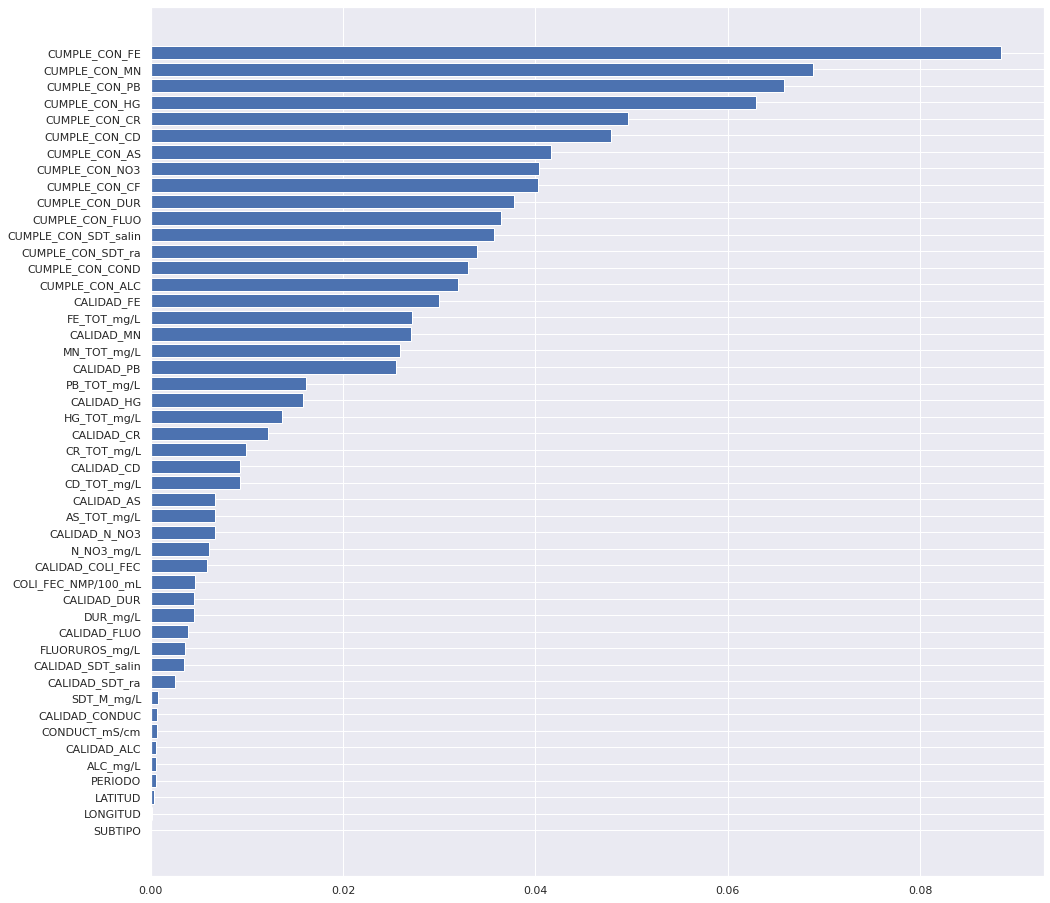

In [18]:
# Graficamos las feature importances

sns.set(rc={'figure.figsize':(16,16)})
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns, rf.feature_importances_[sorted_idx])

Identificamos que las caracterísitcas más importantes son:

... TBD

In [19]:
df_feature_importance = pd.DataFrame(X.columns, rf.feature_importances_[sorted_idx]).reset_index()

In [20]:
n = 10
top_n = df_feature_importance.sort_values(by='index', ascending=False)[:n]
top_n

,index,0
47,0.088410,CUMPLE_CON_FE
46,0.068894,CUMPLE_CON_MN
45,0.065830,CUMPLE_CON_PB
44,0.062928,CUMPLE_CON_HG
43,0.049633,CUMPLE_CON_CR
42,0.047856,CUMPLE_CON_CD
41,0.041574,CUMPLE_CON_AS
40,0.040383,CUMPLE_CON_NO3
39,0.040308,CUMPLE_CON_CF
38,0.037785,CUMPLE_CON_DUR


## Selecciona las variables de mayor importancia.


In [21]:
features_seleccionados = top_n[0].tolist()
target = ['SEMAFORO']

## Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)


In [22]:
X = df_subterraneas[features_seleccionados]
y = df_subterraneas[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [24]:
print('Full data features shape ', X.shape)
print('Full data output shape ', y.shape)

print('\nTrainig data features shape ', X_train.shape)
print('Trainig data output shape ', y_train.shape)

print('\nTesting data features shape ', X_test.shape)
print('Testing data output shape ', y_test.shape)

Full data features shape  (1068, 10)
Full data output shape  (1068, 1)

Trainig data features shape  (907, 10)
Trainig data output shape  (907, 1)

Testing data features shape  (161, 10)
Testing data output shape  (161, 1)


In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [27]:
yhat_train_dtc = dtc.predict(X_train)
yhat_test_dtc = dtc.predict(X_test)

In [28]:
yhat_train_rfc = rfc.predict(X_train)
yhat_test_rfc = rfc.predict(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test_dtc, target_names=None))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       1.00      0.72      0.84        50
           2       0.87      1.00      0.93        72

    accuracy                           0.90       161
   macro avg       0.92      0.89      0.89       161
weighted avg       0.91      0.90      0.90       161



In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test_rfc, target_names=None))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       1.00      0.72      0.84        50
           2       0.87      1.00      0.93        72

    accuracy                           0.90       161
   macro avg       0.92      0.89      0.89       161
weighted avg       0.91      0.90      0.90       161



In [31]:
from sklearn.metrics import confusion_matrix

def display_confusion_matrix(input_cm):
  txt = ['Verdadero Verde ', 'Falso Verde', 'Falso Verde', 'Falso Rojo', 'Verdadero Rojo', 'Falso Rojo', 'Falso Amarillo', 'Falso Amarillo', 'Verdadero Amarillo']
  frecuencia = ["{0:0.0f}".format(value) for value in input_cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in input_cm.flatten()/np.sum(input_cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt, frecuencia, porcentaje)]
  labels = np.asarray(labels).reshape(3,3)

  plt.figure(figsize = (8,8))

  ax = sns.heatmap(input_cm, annot=labels, fmt='', cmap='Blues', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")


In [32]:
cm_dtc = confusion_matrix(yhat_test_dtc, y_test)
cm_rfc = confusion_matrix(yhat_test_rfc, y_test)

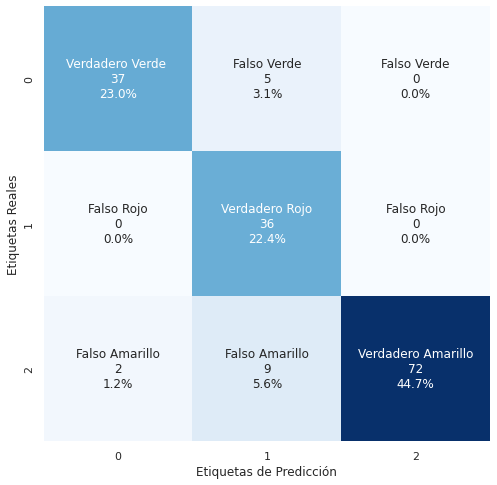

In [33]:
display_confusion_matrix(cm_dtc)

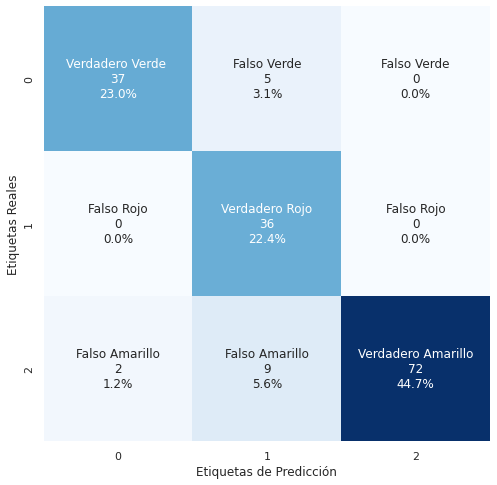

In [34]:
display_confusion_matrix(cm_rfc)

In [35]:

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, y_label, title, x_label):
    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [36]:
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  valor_recall = cm[1][1]/(cm[1][1]+cm[1][0])
  return valor_recall
def mi_gmean(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  gmean = np.sqrt((cm[1][1]/(cm[1][1]+cm[1][0]))*(cm[0][0]/(cm[0][0]+cm[0][1])))
  return gmean
def mi_precision(yreal,ypred):
  cm = confusion_matrix(yreal, ypred)
  precision = cm[0,0]/(cm[0,0]+cm[0,1])
  return precision
def mi_accuracy(yreal,ypred):
  cm = confusion_matrix(yreal, ypred)
  accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
  return accuracy
  
def mi_f1(yreal,ypred):
  cm = confusion_matrix(yreal, ypred)
  precision = cm[0,0]/(cm[0,0]+cm[0,1])
  recall = cm[1][1]/(cm[1][1]+cm[1][0])

  F1 = 2 * (precision* recall) / (precision+ recall)

  return F1

In [37]:


modelos, nombres = get_models()
resultados = list() 
delta_train_sz = np.linspace(.1, 1, 20)

mismetricas = {
      'accuracy': make_scorer(mi_accuracy),
      'recall': make_scorer(mi_recall),
      'gmean': make_scorer(mi_gmean),
      'precision': make_scorer(mi_precision),
      'f1_score': make_scorer(mi_f1)
}

for i in range(len(modelos)): 

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)
  scores = cross_validate(modelos[i], X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True)

  resultados.append(scores)
  print('\nmodelo: ' + nombres[i])
  print(f"""
                    Test    Train
  Mean accuracy:    {np.mean(scores['test_accuracy']) :<5.2%} {np.mean(scores['train_accuracy']): .2%}
  Mean precision:   {np.mean(scores['test_precision']) :<5.2%} {np.mean(scores['train_precision']): .2%}
  Mean recall:      {np.mean(scores['test_recall']) :<5.2%} {np.mean(scores['train_recall']): .2%}
  Mean f1:          {np.mean(scores['test_f1_score']) :<5.2%} {np.mean(scores['train_f1_score']): .2%}
  Mean gmean:       {np.mean(scores['test_gmean']) :<5.2%} {np.mean(scores['train_gmean']): .2%}
  """)

  if nombres[i] == 'DTC':
    depth = range(2, len(delta_train_sz)+1)
    train_scores, valid_scores = validation_curve(estimator = modelos[i],
                                                  X = X_train,
                                                  y = np.ravel(y_train),
                                                  param_name = "max_depth",
                                                  param_range = depth,
                                                  cv = cv,
                                                  scoring = mismetricas['f1_score'])
    mi_LearningCurvePlot(depth, train_scores, valid_scores, "f1 score", "Decision Tree", "Depth")
  elif nombres[i] == 'RFC':
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelos[i],
                                                     X = X_train,
                                                     y = np.ravel(y_train),
                                                     cv = cv ,
                                                     train_sizes = delta_train_sz ,
                                                     random_state=11,
                                                     scoring = mismetricas['recall'])
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "recall", "Random Forest", "Sample Size")

NameError: ignored